In [425]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt

In [426]:
grade_df = pd.read_csv('./gpascore.csv', encoding='cp949')
grade_df

,admit,gre,gpa,rank
0,0,380.0,3.21,3
1,1,660.0,3.67,3
2,1,800.0,4.00,1
3,1,640.0,3.19,4
4,0,520.0,2.33,4
...,...,...,...,...
421,1,750.0,3.44,4
422,1,710.0,3.66,4
423,0,450.0,3.25,4
424,1,760.0,3.76,2


In [427]:
grade_df.isnull().sum()

admit    0
gre      1
gpa      0
rank     0
dtype: int64

In [428]:
grade_df = grade_df.drop(index = 19)

In [429]:
from sklearn.preprocessing import MinMaxScaler
cols = grade_df.keys()
cols

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')

In [430]:
scaler = MinMaxScaler()

In [431]:
from sklearn.model_selection import train_test_split

info_df = grade_df.drop(['admit'], axis=1)
admit_df = grade_df['admit']

In [432]:
x_train, x_test, y_train, y_test = train_test_split(info_df, admit_df, test_size = 0.2, random_state=1)

In [433]:
x_train.shape, y_train.shape

((340, 3), (340,))

In [434]:
x_test.shape, y_test.shape

((85, 3), (85,))

In [435]:
y_train.head()

293    1
86     0
329    0
82     0
288    1
Name: admit, dtype: int64

In [436]:
y_test.head()

173    1
79     1
123    0
377    1
147    0
Name: admit, dtype: int64

In [437]:
x_test.head()

,gre,gpa,rank
173,800.0,3.43,2
79,720.0,4.00,1
123,500.0,2.98,3
377,800.0,4.00,2
147,560.0,2.71,3


In [438]:
x_test.isnull().sum()

gre     0
gpa     0
rank    0
dtype: int64

In [439]:
x_train.isnull().sum()

gre     0
gpa     0
rank    0
dtype: int64

In [440]:
x_train.head()

,gre,gpa,rank
293,800.0,3.97,1
86,600.0,3.32,2
329,500.0,2.93,4
82,500.0,2.71,2
288,800.0,3.15,4


In [441]:
x_train.isnull().sum()

gre     0
gpa     0
rank    0
dtype: int64

In [442]:
#정규화
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
 


In [443]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [444]:
x_train

array([[1.        , 0.98404255, 0.        ],
       [0.6       , 0.63829787, 0.33333333],
       [0.4       , 0.43085106, 1.        ],
       ...,
       [0.32      , 0.2712766 , 0.33333333],
       [0.72      , 0.7287234 , 0.33333333],
       [0.4       , 0.53723404, 0.33333333]])

In [445]:
y_train

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,

In [461]:
model = keras.models.Sequential([keras.layers.Dense(64, activation='relu'),

                          keras.layers.Dense(128, activation='relu'),
                            keras.layers.Dropout(0.25),
                          keras.layers.Dense(1, activation='sigmoid')
])


In [462]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [463]:
#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [464]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=20, shuffle=True)

Epoch 1/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6904 - accuracy: 0.5382 - val_loss: 0.6746 - val_accuracy: 0.7647
Epoch 2/20
17/17 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.6235 - val_loss: 0.6463 - val_accuracy: 0.6941
Epoch 3/20
17/17 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6559 - val_loss: 0.6195 - val_accuracy: 0.7765
Epoch 4/20
17/17 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.6471 - val_loss: 0.5952 - val_accuracy: 0.7529
Epoch 5/20
17/17 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.6559 - val_loss: 0.5749 - val_accuracy: 0.7529
Epoch 6/20
17/17 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.6706 - val_loss: 0.5606 - val_accuracy: 0.7412
Epoch 7/20
17/17 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.6853 - val_loss: 0.5446 - val_accuracy: 0.7529
Epoch 8/20
17/17 [==

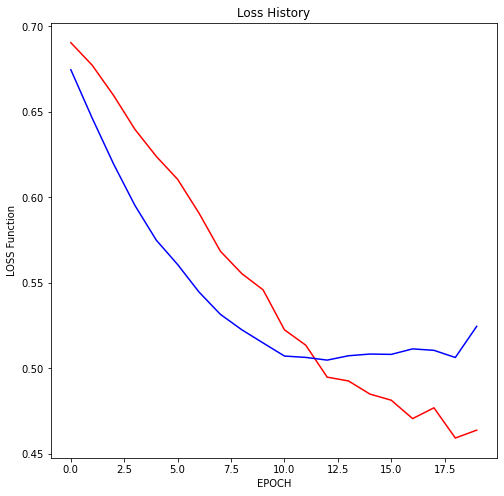

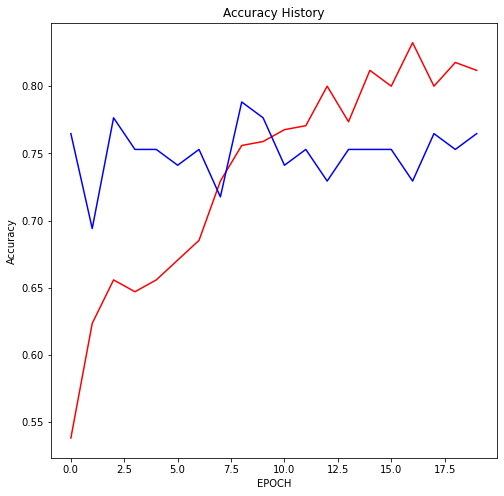

In [465]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")


# 자연어 처리

## Hannanum 한나눔 

In [6]:
import konlpy
from konlpy.tag import Hannanum


In [7]:
hanna = Hannanum()

In [8]:
print(hanna.analyze(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다'))

[[[('롯데마트', 'ncn'), ('의', 'jcm')], [('롯데마트의', 'ncn')], [('롯데마트', 'nqq'), ('의', 'jcm')], [('롯데마트의', 'nqq')]], [[('흑마늘', 'ncn')], [('흑마늘', 'nqq')]], [[('양념', 'ncn')]], [[('치킨', 'ncn'), ('이', 'jcc')], [('치킨', 'ncn'), ('이', 'jcs')], [('치킨', 'ncn'), ('이', 'ncn')]], [[('논란', 'ncpa'), ('이', 'jcc')], [('논란', 'ncpa'), ('이', 'jcs')], [('논란', 'ncpa'), ('이', 'ncn')]], [[('되', 'nbu'), ('고', 'jcj')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecc')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecs')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecx')], [('되', 'paa'), ('고', 'ecc')], [('되', 'paa'), ('고', 'ecs')], [('되', 'paa'), ('고', 'ecx')], [('되', 'pvg'), ('고', 'ecc')], [('되', 'pvg'), ('고', 'ecs')], [('되', 'pvg'), ('고', 'ecx')], [('되', 'px'), ('고', 'ecc')], [('되', 'px'), ('고', 'ecs')], [('되', 'px'), ('고', 'ecx')]], [[('있', 'paa'), ('다', 'ef')], [('있', 'px'), ('다', 'ef')]]]


In [9]:
print(hanna.morphs(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다'))

['롯데마트', '의', '흑마늘', '양념', '치킨', '이', '논란', '이', '되', '고', '있', '다']


In [21]:
print(kkma.nouns(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다'))

['롯데', '롯데마트', '마트', '흑', '흑마늘', '마늘', '양념', '치킨', '논란']


In [10]:
print(hanna.pos(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다'))

[('롯데마트', 'N'), ('의', 'J'), ('흑마늘', 'N'), ('양념', 'N'), ('치킨', 'N'), ('이', 'J'), ('논란', 'N'), ('이', 'J'), ('되', 'P'), ('고', 'E'), ('있', 'P'), ('다', 'E')]


## Kkma 꼬꼬마

In [11]:
from konlpy.tag import Kkma

In [12]:
kkma = Kkma()

In [23]:
#문장 단위로 나눠줌 
print(kkma.sentences(u'그래도 계속 공부합니다. 재밌으니까!'))

['그래도 계속 공부합니다.', '재밌으니까!']


In [17]:
print(kkma.morphs(u'공부를 하면 할 수록 모르는 게 많다는 것을 알 게 된다.'))

['공부', '를', '하', '면', '하', 'ㄹ', '수록', '모르', '는', '것', '이', '많', '다는', '것', '을', '알', 'ㄹ', '것', '이', '되', 'ㄴ다', '.']


In [18]:
print(kkma.pos(u'공부를 하면 할 수록 모르는 게 많다는 것을 알 게 된다.'))

[('공부', 'NNG'), ('를', 'JKO'), ('하', 'VV'), ('면', 'ECE'), ('하', 'VV'), ('ㄹ', 'ETD'), ('수록', 'NNG'), ('모르', 'VV'), ('는', 'ETD'), ('것', 'NNB'), ('이', 'JKS'), ('많', 'VA'), ('다는', 'ETD'), ('것', 'NNB'), ('을', 'JKO'), ('알', 'VV'), ('ㄹ', 'ETD'), ('것', 'NNB'), ('이', 'JKS'), ('되', 'VV'), ('ㄴ다', 'EFN'), ('.', 'SF')]


In [19]:
print(kkma.nouns(u'공부를 하면 할 수록 모르는 게 많다는 것을 알 게 된다.'))

['공부', '수록']


## Komoran 코모란 

In [33]:
from konlpy.tag import Komoran

In [34]:
komo = Komoran()

In [35]:
print(kkma.morphs(u'우와 코모란도 오픈소스가 되었어요!'))

['우', '와', '코', '모란', '도', '오픈', '소스', '가', '되', '었', '어요', '!']


In [36]:
print(kkma.pos(u'공부를 하면 할 수록 모르는 게 많다는 것을 알 게 된다.'))

[('공부', 'NNG'), ('를', 'JKO'), ('하', 'VV'), ('면', 'ECE'), ('하', 'VV'), ('ㄹ', 'ETD'), ('수록', 'NNG'), ('모르', 'VV'), ('는', 'ETD'), ('것', 'NNB'), ('이', 'JKS'), ('많', 'VA'), ('다는', 'ETD'), ('것', 'NNB'), ('을', 'JKO'), ('알', 'VV'), ('ㄹ', 'ETD'), ('것', 'NNB'), ('이', 'JKS'), ('되', 'VV'), ('ㄴ다', 'EFN'), ('.', 'SF')]


In [37]:
print(kkma.nouns(u'공부를 하면 할 수록 모르는 게 많다는 것을 알 게 된다.'))

['공부', '수록']


## Mecab 

In [38]:
from konlpy.tag import Mecab

In [39]:
mec = Mecab()

Exception: Install MeCab in order to use it: http://konlpy.org/en/latest/install/

In [40]:
from konlpy.tag import Okt

In [41]:
okt = Okt()

In [44]:
print(okt.morphs(u'우와 코모란도 오픈소스가 되었어요!'))

['우와', '코', '모란', '도', '오픈소스', '가', '되었어요', '!']


In [45]:
print(okt.pos(u'공부를 하면 할 수록 모르는 게 많다는 것을 알 게 된다.'))

[('공부', 'Noun'), ('를', 'Josa'), ('하면', 'Verb'), ('할', 'Verb'), ('수록', 'Noun'), ('모르는', 'Verb'), ('게', 'Noun'), ('많다는', 'Adjective'), ('것', 'Noun'), ('을', 'Josa'), ('알', 'Noun'), ('게', 'Noun'), ('된다', 'Verb'), ('.', 'Punctuation')]


In [46]:
print(okt.nouns(u'공부를 하면 할 수록 모르는 게 많다는 것을 알 게 된다.'))

['공부', '수록', '게', '것', '알', '게']


In [47]:
print(okt.normalize(u'공부를 하면 할 수록 모르는 게 많다는 것을 알 게 된다.'))

공부를 하면 할 수록 모르는 게 많다는 것을 알 게 된다.


In [48]:
#프레이즈 별 분류 
print(okt.phrases(u'공부를 하면 할 수록 모르는 게 많다는 것을 알 게 된다.'))

['공부', '수록', '수록 모르는 게', '수록 모르는 게 많다는 것']


In [53]:
#단어 기반의 인코딩 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [61]:
sentences = [
    'I love my dog',
    'I love my cat'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}


In [56]:
#텍스트를 시퀀스로 변환하기
sentences = [
  'I love my dog',
  'I love my cat',
  'You love my dog!',
  'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

print(word_index)
print(sequences)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


## 토크나이징

### 단어 단위 토크나이징

In [4]:
from nltk.tokenize import word_tokenize

In [6]:
sentence = '''As long as computers have been around, programmers 
have been trying to write programs that understand languages like English. 
The reason is pretty obvious — humans have been writing things down for thousands 
of years and it would be really helpful if a computer could read and understand 
all that data.Computers can’t yet truly understand English in the way that 
humans do — but they can already do a lot! In certain limited areas, 
what you can do with NLP already seems like magic. You 
might be able to save a lot of time by applying NLP techniques to your own projects.'''

In [7]:
print(word_tokenize(sentence))

['As', 'long', 'as', 'computers', 'have', 'been', 'around', ',', 'programmers', 'have', 'been', 'trying', 'to', 'write', 'programs', 'that', 'understand', 'languages', 'like', 'English', '.', 'The', 'reason', 'is', 'pretty', 'obvious', '—', 'humans', 'have', 'been', 'writing', 'things', 'down', 'for', 'thousands', 'of', 'years', 'and', 'it', 'would', 'be', 'really', 'helpful', 'if', 'a', 'computer', 'could', 'read', 'and', 'understand', 'all', 'that', 'data.Computers', 'can', '’', 't', 'yet', 'truly', 'understand', 'English', 'in', 'the', 'way', 'that', 'humans', 'do', '—', 'but', 'they', 'can', 'already', 'do', 'a', 'lot', '!', 'In', 'certain', 'limited', 'areas', ',', 'what', 'you', 'can', 'do', 'with', 'NLP', 'already', 'seems', 'like', 'magic', '.', 'You', 'might', 'be', 'able', 'to', 'save', 'a', 'lot', 'of', 'time', 'by', 'applying', 'NLP', 'techniques', 'to', 'your', 'own', 'projects', '.']


### 문장 단위 토크나이징 

In [8]:
from nltk.tokenize import sent_tokenize

In [9]:
print(sent_tokenize(sentence))

['As long as computers have been around, programmers \nhave been trying to write programs that understand languages like English.', 'The reason is pretty obvious — humans have been writing things down for thousands \nof years and it would be really helpful if a computer could read and understand \nall that data.Computers can’t yet truly understand English in the way that \nhumans do — but they can already do a lot!', 'In certain limited areas, \nwhat you can do with NLP already seems like magic.', 'You \nmight be able to save a lot of time by applying NLP techniques to your own projects.']
